In [124]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

In [125]:
np.random.seed(2023)
n = 60 # number of sample points
n_bootstraps = 100 # number of bootstraps
degree = 14 # polynomial degree

# data set
x = np.linspace(-1, 1, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

In [126]:
error = np.zeros(degree)
bias = np.zeros(degree)
variance = np.zeros(degree)
polydegree = np.zeros(degree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

$\text{Bias}[\mathbf{\tilde{y}}] = \mathbb{E}\left[(\mathbf{y}- \mathbb{E}[\mathbf{\tilde{y}}])^2 \right]$

$\text{var}[\mathbf{\tilde{y}}]=\mathbb{E}\left[ (\mathbf{\tilde{y}}-\mathbb{E}[\mathbf{\tilde{y}}])^2 \right]$

In [127]:
_error = lambda y_test, y_pred: np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
_bias = lambda y_test, y_pred: np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
_variance = lambda y_pred: np.mean( np.var(y_pred, axis=1, keepdims=True) )

In [128]:
for deg in range(degree):
    model = make_pipeline(PolynomialFeatures(degree = deg), LinearRegression(fit_intercept = False))
    y_pred = np.empty((y_test.shape[0], n_bootstraps))
    for i in range(n_bootstraps):
      x_, y_ = resample(x_train, y_train) # shuffle data
      y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()
    
    polydegree[deg] = deg
    error[deg] = _error(y_test, y_pred)
    bias[deg] = _bias(y_test, y_pred)
    variance[deg] = _variance(y_pred)

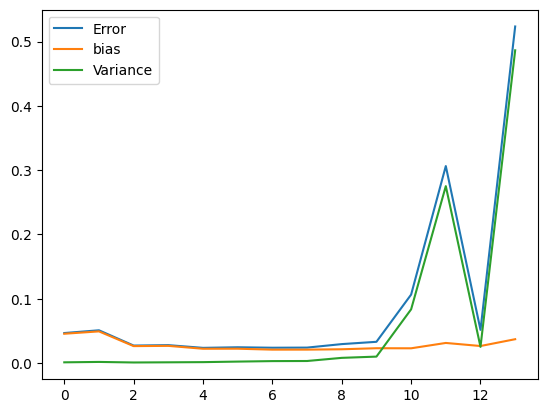

In [129]:
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()